In [1]:
import numpy as np
import multipers as mp
import multipers.data
import multipers.io as mio
import matplotlib.pyplot as plt
import multipers.plots as mpp
import multipers.slicer as mps
import gudhi as gd
from multipers.ml.convolutions import KDE

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


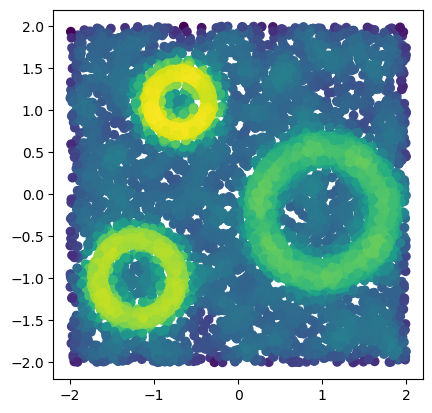

In [2]:
points = mp.data.three_annulus(5000,5000)
grades = - KDE(bandwidth=.1, return_log=True).fit(points).score_samples(points)
plt.scatter(*points.T, c=grades, cmap="viridis_r")
plt.gca().set_aspect(1)

In [10]:
blocks = mio.function_delaunay_presentation(points,grades, degree=-1) # simplicial cplx, second step can be skipped, by providing a degree
slicer = mp.Slicer(blocks)

In [11]:
slicer = mps.minimal_presentation(slicer, degree=1, backend = "mpfree", full_resolution=True) # this is the identity (previous cell aready outputs a minpres)
# An alternative to mpfree is 2pac, but still experimental

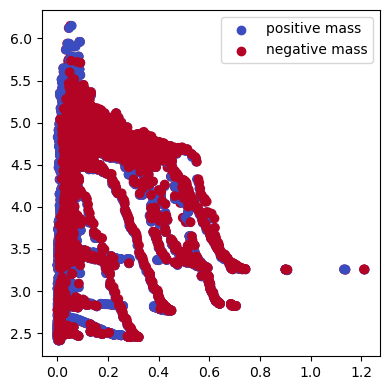

In [12]:
mp.signed_measure(slicer, plot=True); # This is not guaranteed to work yet. It only work w/ full resolutions ftm

In [13]:
mod = mp.module_approximation(slicer) # this is slow for some reason # TODO: benchmark the different backend options

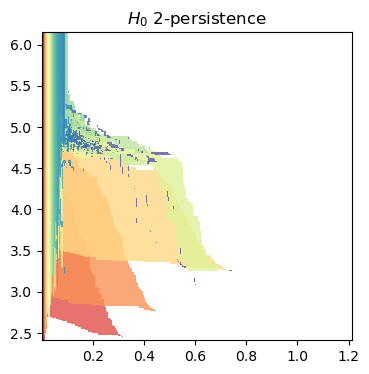

In [14]:
mod.plot(alpha=.8)